MMS	の点群データ（Lasファイル）をLeafmapで可視化

In [1]:
# Leafmap, Open3dをインストール
!pip install leafmap[lidar] open3d

INFO: pip is looking at multiple versions of ipyvtklink to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 15.9 M

Googleドライブをマウントします

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Open3DとNumpyをインポートします
import os
import leafmap
import open3d as o3d
import numpy as np

In [3]:
# Leafmapで点群データ（lasファイル）を読み込みます
%%time
las = leafmap.read_lidar("/content/drive/MyDrive/13.Colab Notebooks/dataset/image_in/08OF4060.las")

CPU times: user 807 ms, sys: 7.16 s, total: 7.96 s
Wall time: 2min 46s


In [4]:
# 点群のポイント数を確認
las.header.point_count

196844561

In [5]:
# Matplotlibをインポート
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [6]:
# データを3次元配列に変換
points = np.vstack((las.X, las.Y, las.Z))
colors = np.vstack((las.red, las.green, las.blue))

In [7]:
# 軸の順番を入れ替え
points = points.transpose()  # 3次元座標
colors = colors.transpose()  # RGB情報

In [8]:
# データを間引
step = 100  # データを1/100に間引く
decimated_points = points[::step]
decimated_colors = colors[::step] / 65535.0  #データを0.0-1.0で正規化します

In [9]:
# データのサイズを確認
len(decimated_points)

1968446

In [10]:
# 点データ確認
decimated_points

array([[  40372683, -134099998,     187891],
       [  40372245, -134099972,     187924],
       [  40371905, -134099999,     187940],
       ...,
       [  40379697, -134099749,     187723],
       [  40379848, -134099864,     187708],
       [  40380068, -134099800,     187694]], dtype=int32)

In [11]:
# 色情報確認
decimated_colors

array([[0.95704585, 0.82032502, 0.50391394],
       [0.99220264, 0.99220264, 0.99220264],
       [0.38672465, 0.3242237 , 0.22656596],
       ...,
       [0.14062715, 0.13672084, 0.1210956 ],
       [0.15234607, 0.14843977, 0.13281453],
       [0.14062715, 0.13672084, 0.12890822]])

In [12]:
# Matplotlib設定
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = [15,15]   # 図の幅と高さをインチで指定する

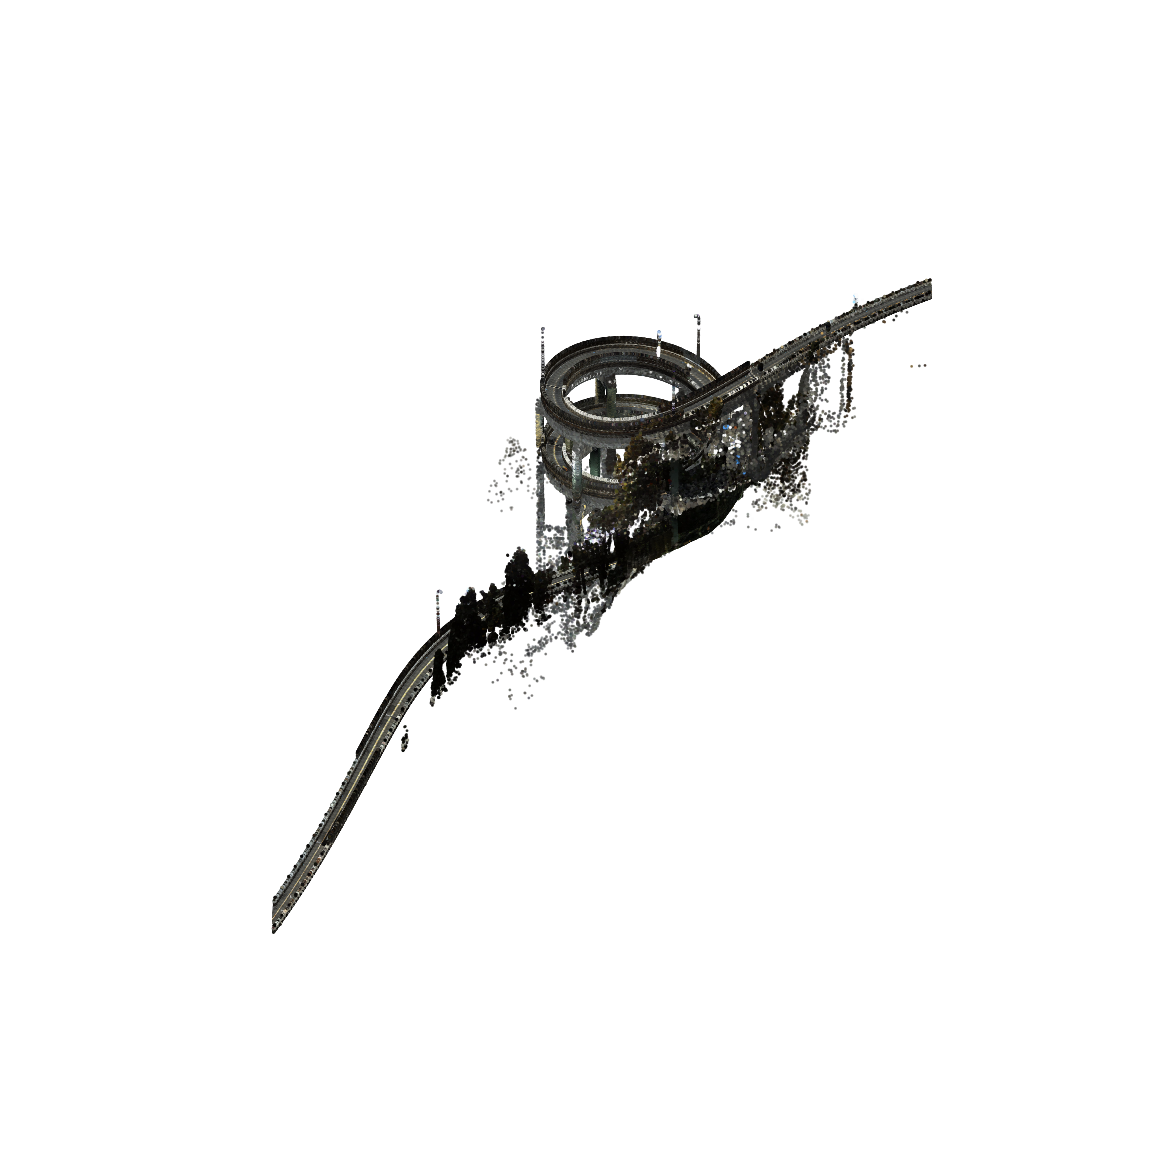

In [13]:
# Matplotlibで点群表示
ax = plt.axes(projection='3d')
ax.view_init(elev=45, azim=0)
ax.axis("off")
ax.scatter(decimated_points[:,0], decimated_points[:,1], decimated_points[:,2], s=1, c=decimated_colors)
plt.show()

In [14]:
# PyPotreeのインストール
!pip install pypotree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pypotree: filename=pypotree-1.0.5-py3-none-any.whl size=10299245 sha256=70379f44ff2b7440b3bcf199700f5165799dd7be381740b0d2252d71db493d9f
  Stored in directory: /root/.cache/pip/wheels/dd/a7/cb/e170eca7e50e28a45330fc44cba177c2e065988994b3ddd8fc
Successfully built pypotree


In [15]:
# PyPotreeのインポート
import pypotree

In [16]:
# PotreeViewer を用いて3D点群を表示するための設定
cloudpath = pypotree.generate_cloud_for_display(decimated_points)
# generate_cloud_for_display で生成したパスに点群を表示
pypotree.display_cloud_colab(cloudpath)

Output hidden; open in https://colab.research.google.com to view.